<a href="https://colab.research.google.com/github/lanyu0322/Shopify_2022_DS_challenge/blob/main/Shopify_Technical_Challenge_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Shopify Fall 2022 Data Science Intern Challenge

***Lan Yu***

***05/19/2022***


In [72]:
cd /content/drive/Shareddrives/Shopify_2022_ds_intern/

/content/drive/Shareddrives/Shopify_2022_ds_intern


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Question 1 


Let's see the data first

In [73]:
# -- load shoe data
data = pd.read_excel("2019 Winter Data Science Intern Challenge Data Set.xlsx")

In [78]:
# -- let's take a look of our data
print(data.shape)
print(data.columns)
data.head(5)

(5000, 7)
Index(['order_id', 'shop_id', 'user_id', 'order_amount', 'total_items',
       'payment_method', 'created_at'],
      dtype='object')


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1.0,53.0,746.0,224.0,2.0,cash,2017-03-13 12:36:56.190
1,2.0,92.0,925.0,90.0,1.0,cash,2017-03-03 17:38:51.999
2,3.0,44.0,861.0,144.0,1.0,cash,2017-03-14 04:23:55.595
3,4.0,18.0,935.0,156.0,1.0,credit_card,2017-03-26 12:43:36.649
4,5.0,18.0,883.0,156.0,1.0,credit_card,2017-03-01 04:35:10.773


In [115]:
# -- check whetehr there is a nan or a duplicate in our shoe data
nan = data.isnull().values.any()*1
dup = sum(data.duplicated())
print("The number of dunplicates is:{0:4d}".format(dup))
print("The number of dunplicates is:{0:4d}".format(nan) )


The number of dunplicates is:   0
The number of dunplicates is:   0


In [129]:
# -- let's do summary statistics for every variable.
round(data.describe(), 2)

,order_id,shop_id,user_id,order_amount,total_items
count,5000.00,5000.00,5000.00,5000.00,5000.00
mean,2500.50,50.08,849.09,3145.13,8.79
std,1443.52,29.01,87.80,41282.54,116.32
min,1.00,1.00,607.00,90.00,1.00
25%,1250.75,24.00,775.00,163.00,1.00
50%,2500.50,50.00,849.00,284.00,2.00
75%,3750.25,75.00,925.00,390.00,3.00
max,5000.00,100.00,999.00,704000.00,2000.00


In [130]:
# -- Let's find out where the outliers are located
# -- group our shoe data by shop_id and sum order_amount in that shop
grouped = data.groupby("shop_id").sum().reset_index()
grouped.sort_values('order_amount', ascending=False)

,shop_id,order_id,user_id,order_amount,total_items
41,42.0,124538.0,38688.0,11990176.0,34063.0
77,78.0,122499.0,39916.0,2263800.0,88.0
88,89.0,172859.0,50618.0,23128.0,118.0
80,81.0,158452.0,49317.0,22656.0,128.0
5,6.0,143483.0,49818.0,22627.0,121.0
...,...,...,...,...,...
1,2.0,126448.0,47370.0,9588.0,102.0
99,100.0,94261.0,34093.0,8547.0,77.0
55,56.0,91134.0,31211.0,8073.0,69.0
31,32.0,96561.0,35986.0,7979.0,79.0


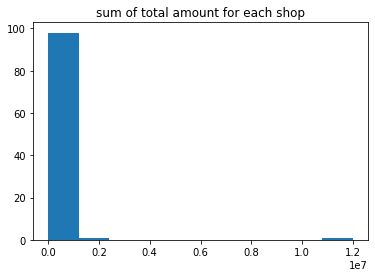

In [126]:
plt.hist(grouped["order_amount"])
plt.title("sum of total amount for each shop")
plt.show()

**a1. what could be going wrong with our calculation?**

The statistical table shows that the AOV was obtained by taking the average of "order_amount" column. Usually, mean value is sensitive to extreme obervation. The AOV of 3145.13 is skewed due to **ourliers**. From the sumed total amount table and histogram, we can find that shop 42 and shop 78 have the extrem values that skew our data.

Also, the standard deviation is too large (41283.54), 
which leads to values that are further away from the mean. Therefore, using the mean value to estimate the AOV is not a good way. 

**a2. Think about a better way to evaluate this data**

A better way to evaluate this data is to use the **median** as the AOV. 
Here are the reasons:
1. All of the data in our dataset is meaningful. Each row represents an order in a shop. We cannot just drop outliers, which will bring bias.
2. Compared to the mean value, the median value is a central value and the outliers do not skew the median as much as the mean.




**b. What metric would you report for this dataset?**

Meidan Order Value

**c. What is its value?**

284.0

In [128]:
data["order_amount"].median()

284.0

# Question 2

 **a. How many orders were shipped by Speedy Express in total?**



```
SELECT COUNT(*) FROM Orders
JOIN Shippers ON Shippers.ShipperID = Orders.ShipperID
WHERE Shippers.ShipperName = 'Speedy Express';
```
I join the orders table with shippers tabler according to same shipperID. Then ***I count the number of order shipped by Speedy Express, which is 54.***

**b. What is the last name of the employee with the most orders?**



```
SELECT Employees.LastName, Count() AS orders_num 
FROM Orders
JOIN Employees ON Orders.EmployeeID = Employees.EmployeeID
GROUP BY Employees.LastName 
ORDER BY orders_num DESC;
```



I join the orders table with employee table first. Then, I group by employee's last name and return the results according to the order number(descending). ***Finally, employee with last name Peacock has the most orders 40.***

**c. What product was ordered the most by customers in Germany?**




```
SELECT Products.ProductName, Sum(OrderDetails.Quantity) as most_ordered FROM Orders
JOIN OrderDetails ON Orders.OrderID = OrderDetails.OrderID
JOIN Customers ON Orders.CustomerID = Customers.CustomerID
JOIN Products ON OrderDetails.ProductID = Products.ProductID
WHERE Country = 'Germany'
GROUP BY Products.ProductName ORDER BY most_ordered DESC;
```



I join four tables: orders, orderdetails, customers, and products according to order id, customer id, and product id. Then, I sum the order quantities for products ordered by customers in Germany. ***I find that Boston Crab Mear was ordered the most (160 orders) by German customers.***